# Modeling and Evaluation

In [171]:
#Imports
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import tree
import itertools
import seaborn as sns
import statsmodels.api as sm

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression


In [60]:
#Load "features.csv" to dataframe
columnas = ['clusters_final','storm_duration','temporal_density','time_delta_min','magnitude_mean','magnitude_max','area','espatial_density','distance_centroid','distance_polygon','distance_max','line','label']
features = pd.read_csv('EquipoRayo/data/Features_timedeltas.csv', sep=',', names=columnas, header= 1)
features.head()

,clusters_final,storm_duration,temporal_density,time_delta_min,magnitude_mean,magnitude_max,area,espatial_density,distance_centroid,distance_polygon,distance_max,line,label
0,2.0,67.558267,0.651290,178.580283,6.852273,15.3,179.207110,0.245526,12.087680,5.149274,19.436939,1,0.0
1,3.0,190.599733,35.047268,5.084717,12.928772,142.6,4779.753742,1.397562,3.022397,0.000000,29.990302,1,1.0
2,4.0,14.722217,0.407547,1081.818783,15.800000,29.5,8.412046,0.713263,18.827234,11.035588,24.060486,1,0.0
3,5.0,140.130567,1.106111,937.832383,13.674839,80.5,579.706629,0.267377,14.263509,0.170764,29.276050,1,0.0
4,6.0,24.259233,1.154200,912.837883,19.896429,57.8,87.799678,0.318908,25.979479,21.392936,29.981450,1,0.0


In [61]:
#Drop some informative features
features.drop(['clusters_final','line'], axis = 'columns', inplace=True)#,'distance_centroid','distance_polygon','area'
features.describe()

,storm_duration,temporal_density,time_delta_min,magnitude_mean,magnitude_max,area,espatial_density,distance_centroid,distance_polygon,distance_max,label
count,3015.000000,3015.000000,3015.000000,3015.000000,3015.000000,3015.000000,3015.000000,3015.000000,3015.000000,3015.000000,3015.000000
mean,35.227971,15.936507,558.153960,22.386697,66.748624,314.621074,0.608562,14.496994,9.073771,21.659600,0.089221
std,42.468308,179.237340,486.211493,10.695410,42.414936,770.022539,2.698957,8.416607,8.668194,8.039722,0.285109
min,0.000767,0.206400,5.000117,3.819149,5.000000,0.044261,0.034448,0.054303,0.000000,1.001474,0.000000
25%,11.214975,0.571875,117.389833,14.692285,33.000000,24.139627,0.156506,7.196897,0.000000,15.243765,0.000000
50%,19.515883,0.905751,387.676783,20.911765,58.000000,68.005678,0.267426,14.499202,7.260115,24.122614,0.000000
75%,42.602550,1.596559,1033.479800,27.696437,90.000000,235.975495,0.482827,22.108744,16.304229,29.343092,0.000000
max,369.232117,6521.739130,1438.060500,89.800000,279.000000,13533.837479,112.967161,29.734775,28.933544,29.999760,1.000000


In [254]:
features.head(10)

,storm_duration,temporal_density,time_delta_min,magnitude_mean,magnitude_max,area,espatial_density,distance_centroid,distance_polygon,distance_max,label
0,67.558267,0.651290,178.580283,6.852273,15.3,179.207110,0.245526,12.087680,5.149274,19.436939,0.0
1,190.599733,35.047268,5.084717,12.928772,142.6,4779.753742,1.397562,3.022397,0.000000,29.990302,1.0
2,14.722217,0.407547,1081.818783,15.800000,29.5,8.412046,0.713263,18.827234,11.035588,24.060486,0.0
3,140.130567,1.106111,937.832383,13.674839,80.5,579.706629,0.267377,14.263509,0.170764,29.276050,0.0
4,24.259233,1.154200,912.837883,19.896429,57.8,87.799678,0.318908,25.979479,21.392936,29.981450,0.0
5,15.247783,1.180499,231.893500,17.905556,97.5,39.931238,0.450775,16.369611,11.686820,20.061561,0.0
6,139.796117,3.919994,88.948167,13.451095,147.3,1623.815053,0.337477,14.509036,0.000000,29.977985,0.0
7,76.831117,12.260657,5.050833,14.002866,86.3,1487.354038,0.633339,7.242488,0.000000,29.889774,1.0
8,5.665767,1.588488,74.049617,9.311111,32.2,23.746290,0.379007,17.945444,12.468829,21.941829,0.0
9,10.001383,0.799889,68.404333,20.037500,44.8,13.887673,0.576050,22.369872,17.920428,26.486007,0.0


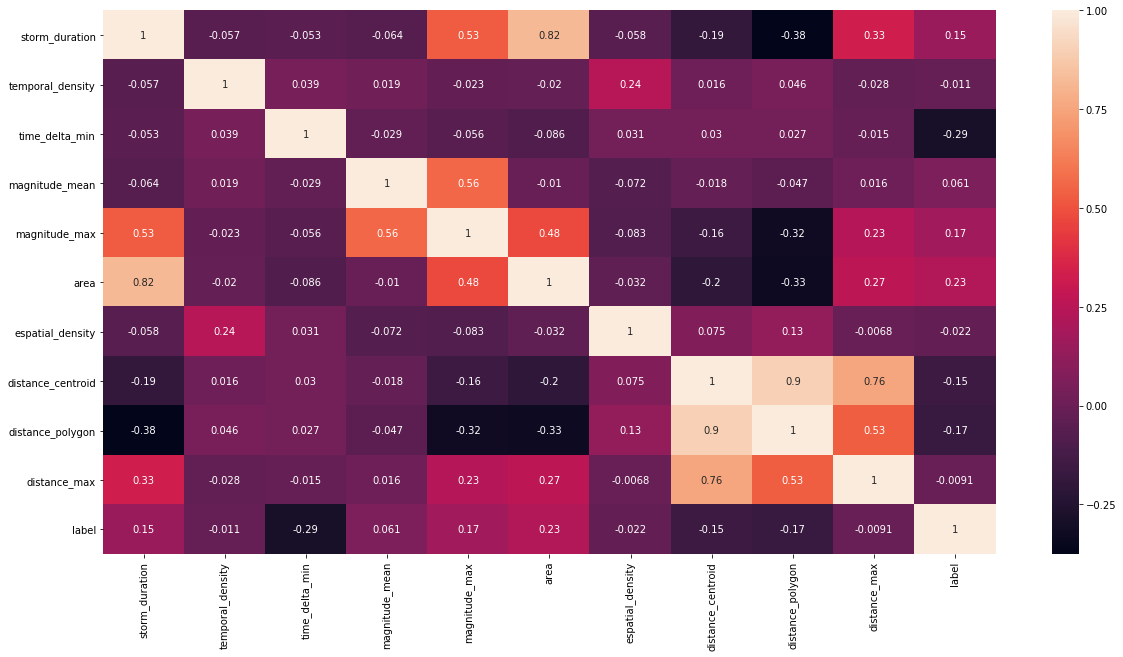

In [62]:
#Correlation matrix
plt.figure(figsize=(20,10))
corr_matrix = features.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [63]:
#features to X
from sklearn.preprocessing import StandardScaler
feature_df = features.loc[:, features.columns != 'label']
X = np.asarray(feature_df)
X = np.nan_to_num(X)

In [64]:
#labels (target) to y
y = np.asarray(features['label'])
y [0:5]

array([0., 1., 0., 0., 0.])

In [65]:
#Split Train - Test. 80%-20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=2, stratify=features["label"])
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2412, 10) (2412,)
Test set: (603, 10) (603,)


In [66]:
#develop matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Decision Tree

In [67]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4, class_weight="balanced")
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4)

In [68]:
predTree = drugTree.predict(X_test)
pscores_tree = drugTree.predict_proba(X_test)

              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95       549
         1.0       0.49      0.80      0.61        54

    accuracy                           0.91       603
   macro avg       0.73      0.86      0.78       603
weighted avg       0.93      0.91      0.92       603

Confusion matrix, without normalization
[[504  45]
 [ 11  43]]


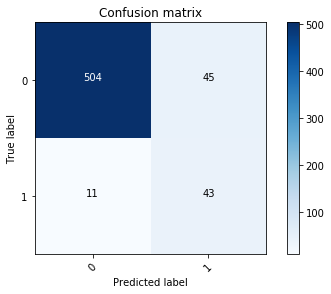

In [168]:
# Compute confusion matrix
y_pred_DT = pscores_tree[:,1]>0.7
cnf_matrix = confusion_matrix(y_test, y_pred_DT, labels = [0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred_DT))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = [0,1], normalize= False,  title='Confusion matrix')
plt.show()

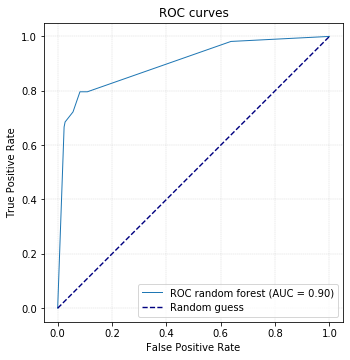

In [83]:
# DT
roc_RF = metrics.roc_curve(y_test, pscores_tree[:,1])
auc_RF = metrics.auc( roc_RF[0], roc_RF[1] )


plt.figure(figsize=(5.5,5.5))
plt.plot(roc_RF[0], roc_RF[1], lw=1,label=f"ROC random forest (AUC = {auc_RF:0.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=1.4, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc='lower right')
plt.gca().set_aspect(1)
plt.grid(ls='--', alpha=0.6, lw=0.4)

# Random Forest

In [247]:
forest_class = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=4)
forest_class.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=4)

In [248]:
predforest = forest_class.predict(X_test)
pscores_forest = forest_class.predict_proba(X_test)

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       549
         1.0       0.62      0.74      0.67        54

    accuracy                           0.94       603
   macro avg       0.79      0.85      0.82       603
weighted avg       0.94      0.94      0.94       603

Confusion matrix, without normalization
[[524  25]
 [ 14  40]]


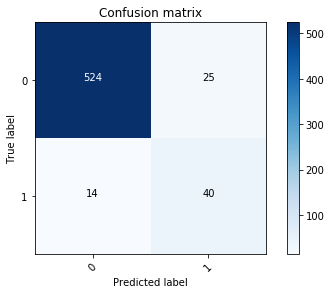

In [249]:
# Compute confusion matrix
predforest = pscores_forest[:,1]>0.25
cnf_matrix = confusion_matrix(y_test, predforest, labels = [0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, predforest))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = [0,1], normalize= False,  title='Confusion matrix')
plt.show()

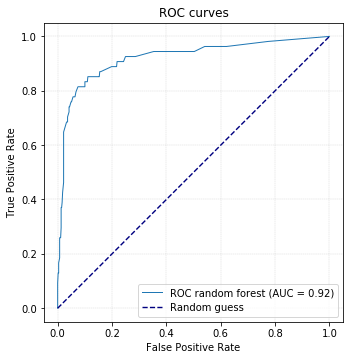

In [220]:
# RF
roc_RF = metrics.roc_curve(y_test, pscores_forest[:,1])
auc_RF = metrics.auc( roc_RF[0], roc_RF[1] )


plt.figure(figsize=(5.5,5.5))
plt.plot(roc_RF[0], roc_RF[1], lw=1,label=f"ROC random forest (AUC = {auc_RF:0.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=1.4, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc='lower right')
plt.gca().set_aspect(1)
plt.grid(ls='--', alpha=0.6, lw=0.4)

# Support Vector Machine

In [108]:
clf = svm.SVC(kernel='rbf', C=3, probability=True, class_weight="balanced")
clf.fit(X_train, y_train)

SVC(C=3, class_weight='balanced', probability=True)

In [109]:
yhat_SVM = clf.predict(X_test)
pscores_svm = clf.predict_proba(X_test)

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.96       549
         1.0       0.54      0.80      0.64        54

    accuracy                           0.92       603
   macro avg       0.76      0.86      0.80       603
weighted avg       0.94      0.92      0.93       603

Confusion matrix, without normalization
[[512  37]
 [ 11  43]]


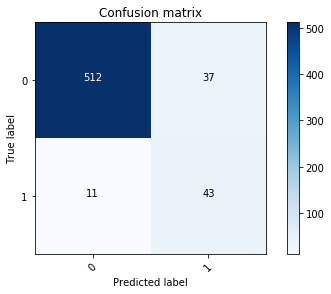

In [164]:
# Compute confusion matrix
y_pred_SVM = pscores_svm[:,1]>0.3
cnf_matrix = confusion_matrix(y_test, y_pred_SVM, labels = [0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred_SVM))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = [0,1], normalize= False,  title='Confusion matrix')
plt.show()

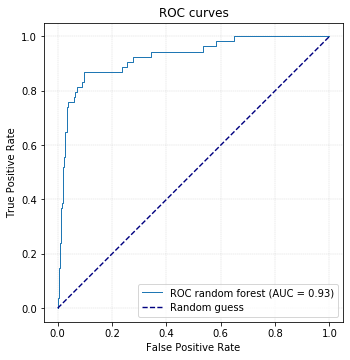

In [111]:
# DT
roc_RF = metrics.roc_curve(y_test, pscores_svm[:,1])
auc_RF = metrics.auc( roc_RF[0], roc_RF[1] )


plt.figure(figsize=(5.5,5.5))
plt.plot(roc_RF[0], roc_RF[1], lw=1,label=f"ROC random forest (AUC = {auc_RF:0.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=1.4, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc='lower right')
plt.gca().set_aspect(1)
plt.grid(ls='--', alpha=0.6, lw=0.4)

# Logistic Regression

In [148]:
LR = LogisticRegression(C=0.05, solver='liblinear', class_weight="balanced").fit(X_train,y_train)

In [149]:
yhat_LR = LR.predict(X_test)
pscores_LR = LR.predict_proba(X_test)

In [150]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat_LR, average='weighted')

0.8082394001160823

              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93       549
         1.0       0.42      0.81      0.55        54

    accuracy                           0.88       603
   macro avg       0.70      0.85      0.74       603
weighted avg       0.93      0.88      0.90       603

Confusion matrix, without normalization
[[487  62]
 [ 10  44]]


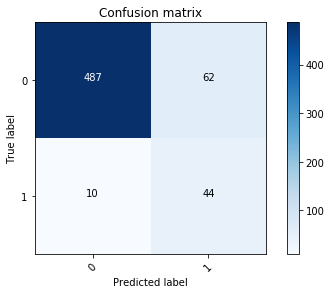

In [151]:
# Compute confusion matrix
y_pred_LR = pscores_LR[:,1]>0.65
cnf_matrix = confusion_matrix(y_test, y_pred_LR, labels = [0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred_LR))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = [0,1], normalize= False,  title='Confusion matrix')
plt.show()

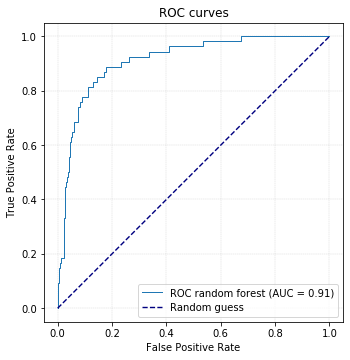

In [152]:
# DT
roc_RF = metrics.roc_curve(y_test, pscores_LR[:,1])
auc_RF = metrics.auc( roc_RF[0], roc_RF[1] )


plt.figure(figsize=(5.5,5.5))
plt.plot(roc_RF[0], roc_RF[1], lw=1,label=f"ROC random forest (AUC = {auc_RF:0.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=1.4, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc='lower right')
plt.gca().set_aspect(1)
plt.grid(ls='--', alpha=0.6, lw=0.4)

*Result*

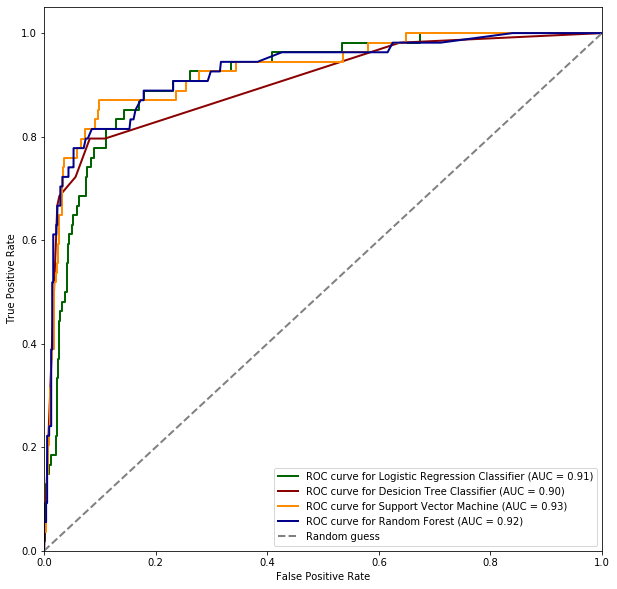

In [225]:
# ROC CURVES
roc_RF = metrics.roc_curve(y_test, pscores_forest[:, 1])
auc_RF = metrics.auc( roc_RF[0], roc_RF[1] )
roc_DT = metrics.roc_curve(y_test, pscores_tree[:, 1])
auc_DT = metrics.auc( roc_DT[0], roc_DT[1] )
roc_SVM = metrics.roc_curve(y_test, pscores_svm[:,1])
auc_SVM = metrics.auc( roc_SVM[0], roc_SVM[1] )
roc_LR = metrics.roc_curve(y_test, pscores_LR[:,1])
auc_LR = metrics.auc( roc_LR[0], roc_LR[1] )


plt.figure(figsize=(10,10))
line_width = 2
plt.plot(roc_LR[0], roc_LR[1], color='darkgreen', lw=line_width,
         label=f"ROC curve for Logistic Regression Classifier (AUC = {auc_LR:0.2f})")
plt.plot(roc_DT[0], roc_DT[1], color='darkred', lw=line_width,
         label=f"ROC curve for Desicion Tree Classifier (AUC = {auc_DT:0.2f})")
plt.plot(roc_SVM[0], roc_SVM[1], color='darkorange', lw=line_width,
         label=f"ROC curve for Support Vector Machine (AUC = {auc_SVM:0.2f})")
plt.plot(roc_RF[0], roc_RF[1], color='darkblue', lw=line_width,
         label=f"ROC curve for Random Forest (AUC = {auc_RF:0.2f})")

plt.plot([0, 1], [0, 1], color='gray', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Classification for Enrollment in the Employment Program')
plt.legend(loc='lower right')
plt.show()


# Save Model

In [250]:
#Logistic Regression
import pickle    
with open('SVM_model.pkl', 'wb') as model_file:
  pickle.dump(clf, model_file)

# Load Model

In [251]:
file = open('SVM_model.pkl','rb')
model_SVM = pickle.load(file)